In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso

In [2]:
#chargement des données
Boston_Data = pd.read_csv('Boston_Data.csv',header=0)

In [3]:
X = Boston_Data.drop(['Unnamed: 0','Y'],axis=1)
Y = Boston_Data['Y']

#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("Y_train",Y_train.shape)
print("Y_test",Y_test.shape)

X_train (379, 18)
X_test (127, 18)
Y_train (379,)
Y_test (127,)


In [4]:
scaler = StandardScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

In [81]:
from sklearn.linear_model import LassoCV
#obtention des valeurs des coefs. corresp.
from sklearn.linear_model import lasso_path

my_alphas = np.array([0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0,1.001,1.01,1.02,1.05,2])
#my_alphas = np.arange(0.01,30,0.1)

#outil pour la détection de la solution la plus performante en validation croisée
#random_state = 0 pour fixer l’initialisation du générateur de nombre aléatoire
#cv = 5 pour 5-fold validation croisée
lcv = LassoCV(alphas=my_alphas,normalize=False,fit_intercept=False,random_state=42,cv=5)

#lancement sur l'échantillon d'apprentissage
lcv.fit(X_train_n, Y_train)

LassoCV(alphas=array([1.000e-03, 1.000e-02, 2.000e-02, 2.500e-02, 5.000e-02, 1.000e-01,
       2.500e-01, 5.000e-01, 8.000e-01, 1.000e+00, 1.001e+00, 1.010e+00,
       1.020e+00, 1.050e+00, 2.000e+00]),
        cv=5, fit_intercept=False, random_state=42)

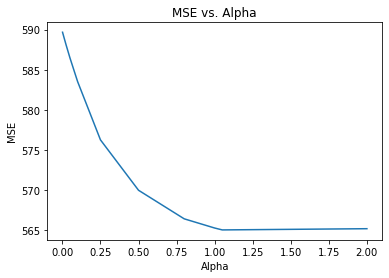

1.05


In [101]:
#moyenne mse en validation croisée pour chaque alpha
avg_rmse = np.sqrt(np.mean(lcv.mse_path_,axis=1))
#sous-forme graphique
plt.plot(lcv.alphas_,avg_mse)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.show()
print(lcv.alpha_)

In [98]:
model = Lasso(alpha=1.05, fit_intercept=True)
model.fit(X_train_n, Y_train)

Lasso(alpha=1.05)

In [99]:
# Evaluation du training set
y_train_predict = model.predict(X_train_n)
error = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
score = r2_score(Y_train, y_train_predict)

print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(error))
print('le score R2 est {}'.format(score))
print('\n')

# model evaluation du testing set
y_test_predict = model.predict(X_test_n)
error = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
score = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(error))
print('le score R2 est {}'.format(score))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 5.366017142585634
le score R2 est 0.6753092268857508


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 5.112991189326277
le score R2 est 0.6266779203334305


In [100]:
model.coef_

array([ 0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.01940939, -0.        ,
        2.96764529, -0.        , -0.        , -0.        , -0.        ,
       -1.20562209,  0.35670931, -3.55098728])